In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,72,1,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,75,2,30.188278,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,83,2,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,43,2,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,75,2,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [8]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       767
         1.0       0.68      0.30      0.41       115

    accuracy                           0.89       882
   macro avg       0.79      0.64      0.68       882
weighted avg       0.87      0.89      0.87       882

[[751  16]
 [ 81  34]]
root mean squared error (RMSE): 0.3316282923139076
R-squared (R2 ): 0.03005498554503716
MAE 0.10997732426303855

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       250
         1.0       0.67      0.32      0.43        44

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.86      0.87      0.85       294

[[243   7]
 [ 30  14]]
root mean squared error (RMSE): 0.35475391489884145
R-squared (R2 ): 0.011090909090909262
MAE 0.12585034013605442

Accuracy score: 0.8741496598639455



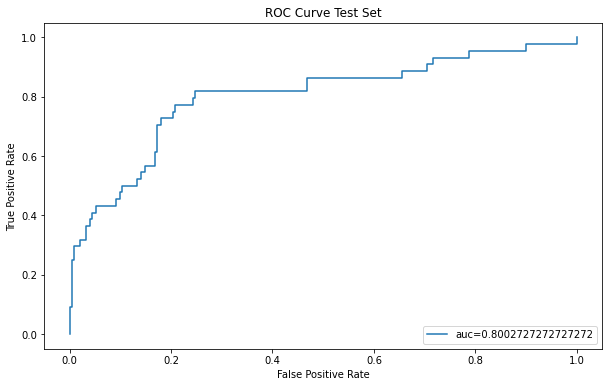

In [11]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [12]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
37                      PCO2    0.710827
39             Comorbidities    0.517858
26             Urea nitrogen    0.496983
3                 heart rate    0.494314
22                       INR    0.359303
10                hematocrit    0.328752
32                 Anion gap    0.312838
16                 Leucocyte    0.251328
36               Lactic acid    0.216100
33             Magnesium ion    0.212727
6           Respiratory rate    0.186631
28           Blood potassium    0.183004
15                       RDW    0.177490
4    Systolic blood pressure    0.176321
12                       MCH    0.151210
0                        age    0.141245
24           Creatine kinase    0.128402
34                        PH    0.097414
38                        EF    0.085171
13                      MCHC    0.074889
23                 NT-proBNP    0.040155
29              Blood sodium    0.039167
31                  Chloride   -0.062728
14              

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       250
         1.0       0.29      0.32      0.30        44

    accuracy                           0.78       294
   macro avg       0.58      0.59      0.59       294
weighted avg       0.79      0.78      0.79       294

[[216  34]
 [ 30  14]]
root mean squared error (RMSE): 0.46656947481584343
R-squared (R2 ): -0.7105454545454544
MAE 0.21768707482993196

Accuracy score: 0.782312925170068



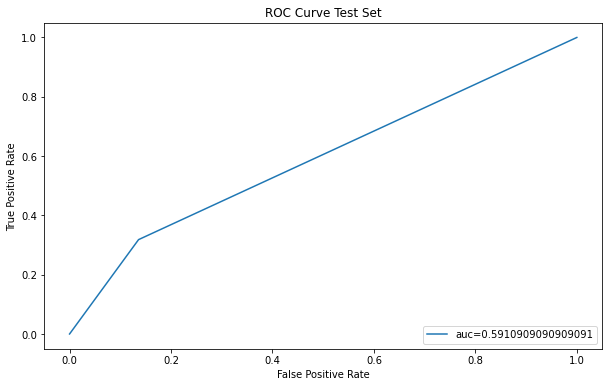

In [13]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       250
         1.0       0.62      0.11      0.19        44

    accuracy                           0.86       294
   macro avg       0.74      0.55      0.56       294
weighted avg       0.83      0.86      0.81       294

[[247   3]
 [ 39   5]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.12254545454545429
MAE 0.14285714285714285

Accuracy score: 0.8571428571428571



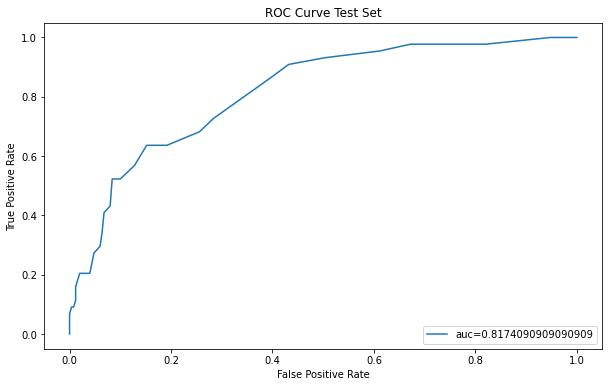

In [14]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [15]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.05239896368360921, 'Anion gap'),
 (0.0458377225794313, 'Leucocyte'),
 (0.044318657731885445, 'Urine output'),
 (0.041552872920870884, 'Bicarbonate'),
 (0.04019577309229737, 'Lymphocyte'),
 (0.0382307464052244, 'Blood calcium'),
 (0.03667851554027282, 'Lactic acid'),
 (0.034766647572910696, 'temperature'),
 (0.03090677988687359, 'Blood sodium'),
 (0.030439467393083265, 'PH'),
 (0.03043646769599974, 'Blood potassium'),
 (0.028393233909403293, 'Urea nitrogen'),
 (0.02691950403652389, 'heart rate'),
 (0.025773742354790668, 'Creatinine'),
 (0.02489041555692013, 'Platelets'),
 (0.02401908332781006, 'NT-proBNP'),
 (0.02393774309756996, 'SP O2'),
 (0.023855602070043887, 'Magnesium ion'),
 (0.02341077031527345, 'Respiratory rate'),
 (0.023035549874429156, 'glucose'),
 (0.022565300758685698, 'Neutrophils'),
 (0.021877149674380484, 'RDW'),
 (0.02163178514124602, 'BMI'),
 (0.021503581507682976, 'RBC'),
 (0.02103447708508849, 'Chloride'),
 (0.020534701301314157, 'INR'),
 (0.02026100286440366, '

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       250
         1.0       1.00      0.11      0.20        44

    accuracy                           0.87       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.89      0.87      0.82       294

[[250   0]
 [ 39   5]]
root mean squared error (RMSE): 0.3642156795423418
R-squared (R2 ): -0.04236363636363616
MAE 0.1326530612244898

Accuracy score: 0.8673469387755102



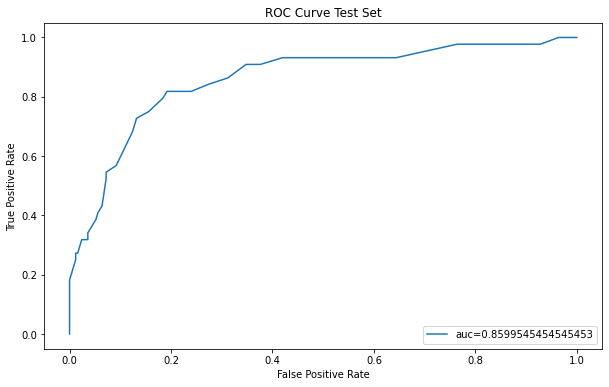

In [16]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

In [26]:
# List the features sorted in descending order by feature importance
sorted(zip(et.feature_importances_, X.columns), reverse=True)

[(0.03841421899686083, 'Anion gap'),
 (0.037783794574087225, 'Lactic acid'),
 (0.03706028460742109, 'Bicarbonate'),
 (0.03690593270557949, 'Leucocyte'),
 (0.03370444423440515, 'Blood calcium'),
 (0.03325364764245004, 'Urea nitrogen'),
 (0.03125065079222771, 'Urine output'),
 (0.030036027941006894, 'Chloride'),
 (0.029637007540853865, 'PH'),
 (0.029508100538582004, 'Blood sodium'),
 (0.02812549351438477, 'Lymphocyte'),
 (0.027762985439188377, 'temperature'),
 (0.02723935616053744, 'heart rate'),
 (0.025619423802734763, 'Platelets'),
 (0.02535611770391387, 'SP O2'),
 (0.025182393942631595, 'Blood potassium'),
 (0.024830022207594785, 'Neutrophils'),
 (0.0247342721253982, 'Magnesium ion'),
 (0.024192656915030423, 'Systolic blood pressure'),
 (0.023733310835554237, 'RDW'),
 (0.02326697730586067, 'PT'),
 (0.022214598439457375, 'Comorbidities'),
 (0.022179494383697203, 'NT-proBNP'),
 (0.02204351690818309, 'Creatine kinase'),
 (0.021905954589916878, 'RBC'),
 (0.02149111347940337, 'EF'),
 (0.02

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       767
         1.0       0.87      0.60      0.71       115

    accuracy                           0.94       882
   macro avg       0.91      0.79      0.84       882
weighted avg       0.93      0.94      0.93       882

[[757  10]
 [ 46  69]]
root mean squared error (RMSE): 0.25197631533948484
R-squared (R2 ): 0.4400317442321864
MAE 0.06349206349206349

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       250
         1.0       0.42      0.32      0.36        44

    accuracy                           0.83       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.82      0.83      0.82       294

[[231  19]
 [ 30  14]]
root mean squared error (RMSE): 0.408248290463863
R-squared (R2 ): -0.3096363636363635
MAE 0.16666666666666666

Accuracy score: 0.8333333333333334



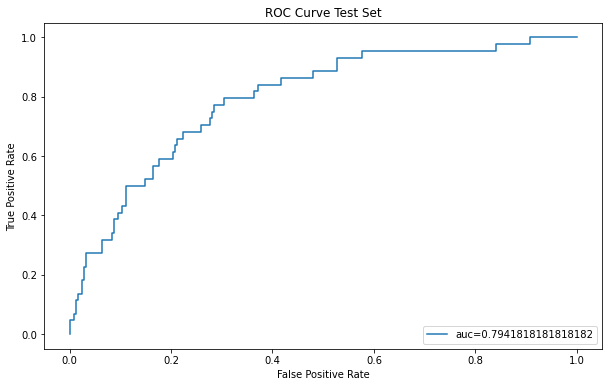

In [17]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       767
         1.0       1.00      0.85      0.92       115

    accuracy                           0.98       882
   macro avg       0.99      0.93      0.95       882
weighted avg       0.98      0.98      0.98       882

[[767   0]
 [ 17  98]]
root mean squared error (RMSE): 0.13883218797250715
R-squared (R2 ): 0.8300096366419137
MAE 0.01927437641723356

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       250
         1.0       0.63      0.27      0.38        44

    accuracy                           0.87       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.85      0.87      0.84       294

[[243   7]
 [ 32  12]]
root mean squared error (RMSE): 0.3642156795423418
R-squared (R2 ): -0.04236363636363616
MAE 0.1326530612244898

Accuracy score: 0.8673469387755102



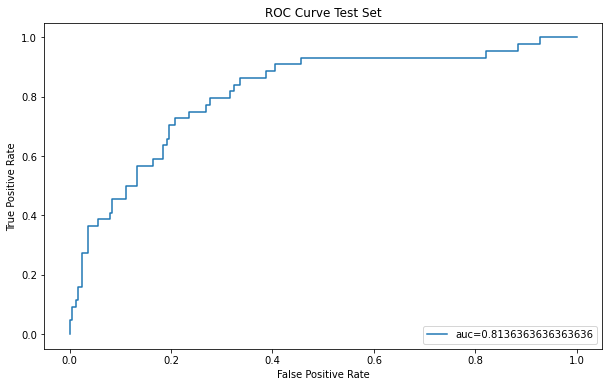

In [18]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       250
         1.0       0.65      0.25      0.36        44

    accuracy                           0.87       294
   macro avg       0.76      0.61      0.64       294
weighted avg       0.85      0.87      0.84       294

[[244   6]
 [ 33  11]]
root mean squared error (RMSE): 0.3642156795423418
R-squared (R2 ): -0.04236363636363616
MAE 0.1326530612244898

Accuracy score: 0.8673469387755102



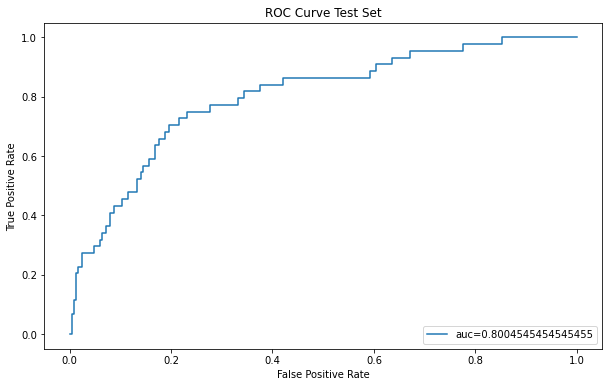

In [19]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [20]:
# List the features sorted in descending order by feature importance
sorted(zip(xgb.feature_importances_, X.columns), reverse=True)

[(0.06466839, 'Bicarbonate'),
 (0.048496913, 'Anion gap'),
 (0.047485236, 'Lymphocyte'),
 (0.04414333, 'INR'),
 (0.042456187, 'Lactic acid'),
 (0.03981358, 'Leucocyte'),
 (0.038990214, 'Urine output'),
 (0.031530976, 'Platelets'),
 (0.029856147, 'Blood sodium'),
 (0.028547553, 'Creatine kinase'),
 (0.028087273, 'Magnesium ion'),
 (0.027320698, 'PH'),
 (0.026981099, 'age'),
 (0.026870333, 'Comorbidities'),
 (0.025944535, 'Blood calcium'),
 (0.02589832, 'hematocrit'),
 (0.025232764, 'SP O2'),
 (0.02503863, 'RDW'),
 (0.02439585, 'RBC'),
 (0.023906225, 'heart rate'),
 (0.022235136, 'MCHC'),
 (0.02019541, 'Diastolic blood pressure'),
 (0.019853152, 'Basophils'),
 (0.019698897, 'Respiratory rate'),
 (0.01962482, 'Chloride'),
 (0.019581048, 'glucose'),
 (0.019351292, 'Urea nitrogen'),
 (0.019032875, 'Neutrophils'),
 (0.018036576, 'BMI'),
 (0.017763928, 'temperature'),
 (0.017748076, 'Creatinine'),
 (0.01676251, 'PT'),
 (0.016164914, 'Blood potassium'),
 (0.015837416, 'NT-proBNP'),
 (0.0137810

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       767
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882

[[767   0]
 [  0 115]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       250
         1.0       0.62      0.18      0.28        44

    accuracy                           0.86       294
   macro avg       0.74      0.58      0.60       294
weighted avg       0.83      0.86      0.83       294

[[245   5]
 [ 36   8]]
root mean squared error (RMSE): 0.3734377890799553
R-squared (R2 ): -0.09581818181818158
MAE 0.13945578231292516

Accuracy score: 0.8605442176870748



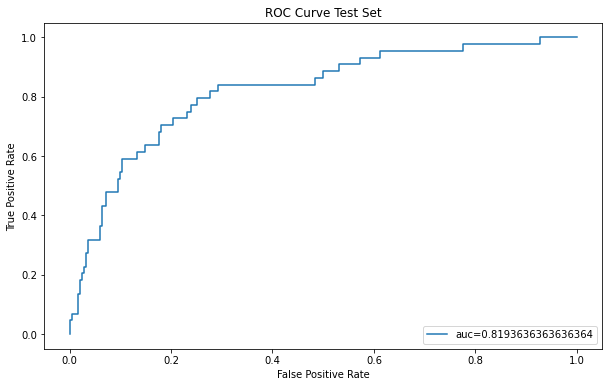

In [21]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       767
         1.0       1.00      0.30      0.47       115

    accuracy                           0.91       882
   macro avg       0.95      0.65      0.71       882
weighted avg       0.92      0.91      0.89       882

[[767   0]
 [ 80  35]]
root mean squared error (RMSE): 0.3011693009684171
R-squared (R2 ): 0.20004534890312342
MAE 0.09070294784580499

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       250
         1.0       1.00      0.05      0.09        44

    accuracy                           0.86       294
   macro avg       0.93      0.52      0.50       294
weighted avg       0.88      0.86      0.80       294

[[250   0]
 [ 42   2]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.12254545454545429
MAE 0.14285714285714285

Accuracy score: 0.8571428571428571



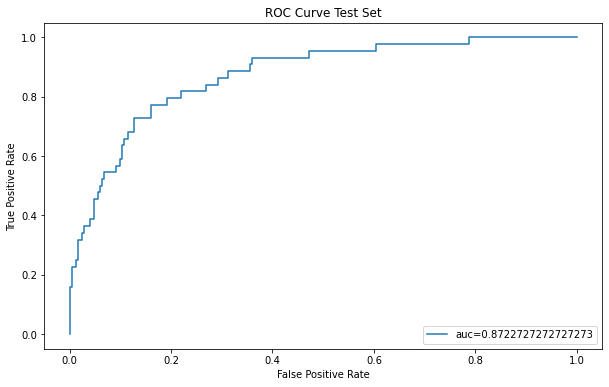

In [22]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

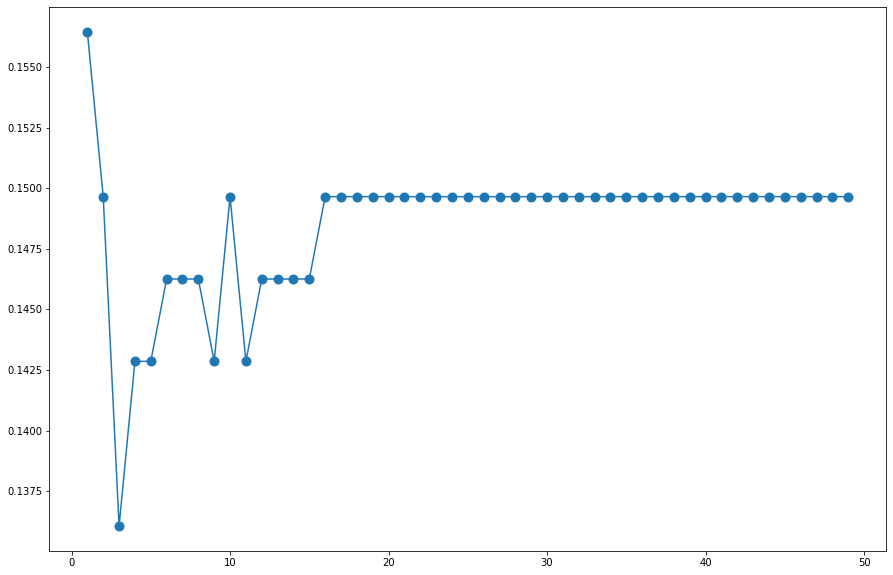

In [23]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       767
         1.0       0.90      0.16      0.27       115

    accuracy                           0.89       882
   macro avg       0.89      0.58      0.60       882
weighted avg       0.89      0.89      0.85       882

[[765   2]
 [ 97  18]]
root mean squared error (RMSE): 0.33502969713024494
R-squared (R2 ): 0.010056119267615182
MAE 0.11224489795918367

Testing SET
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       250
         1.0       0.75      0.07      0.12        44

    accuracy                           0.86       294
   macro avg       0.80      0.53      0.52       294
weighted avg       0.84      0.86      0.80       294

[[249   1]
 [ 41   3]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.12254545454545429
MAE 0.14285714285714285

Accuracy score: 0.8571428571428571



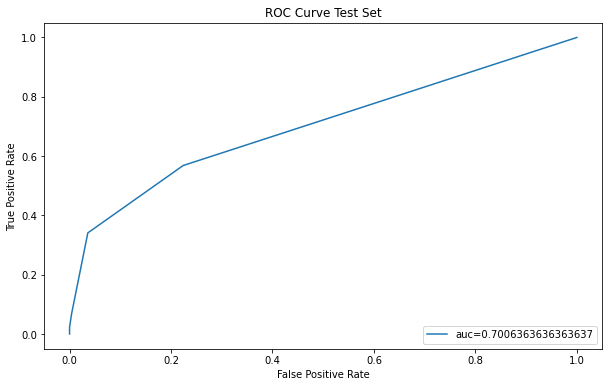

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)

In [25]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787868 using {'scale_pos_weight': 1}
0.787868 (0.072924) with: {'scale_pos_weight': 1}
0.781452 (0.065888) with: {'scale_pos_weight': 10}
0.773262 (0.074195) with: {'scale_pos_weight': 25}
0.772422 (0.065629) with: {'scale_pos_weight': 50}
0.773302 (0.077610) with: {'scale_pos_weight': 75}
0.772134 (0.074832) with: {'scale_pos_weight': 99}
0.776665 (0.070863) with: {'scale_pos_weight': 100}
0.748191 (0.077981) with: {'scale_pos_weight': 1000}
